In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import layers, models
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import urllib.request
import random
import tarfile
import zipfile
import tf_slim as slim



In [3]:
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn m√¥ h√¨nh Inception V3
INCEPTION_V3_URL = 'http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz'
MODEL_DIR = 'models/inception_v3'

# T·∫°o th∆∞ m·ª•c l∆∞u m√¥ h√¨nh n·∫øu ch∆∞a t·ªìn t·∫°i
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

# T·∫£i v√† gi·∫£i n√©n m√¥ h√¨nh
filename = INCEPTION_V3_URL.split('/')[-1]
filepath = os.path.join(MODEL_DIR, filename)
if not os.path.exists(filepath):
    urllib.request.urlretrieve(INCEPTION_V3_URL, filepath)
    with tarfile.open(filepath, 'r:gz') as tar:
        tar.extractall(path=MODEL_DIR)

In [4]:
file_path = 'D:/NCKH/DataSet_LFW.zip'
extract_path = 'data/lfw'

# T·∫°o th∆∞ m·ª•c gi·∫£i n√©n n·∫øu ch∆∞a t·ªìn t·∫°i
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
import numpy as np
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# Kh·ªüi t·∫°o m√¥ h√¨nh Inception V3 kh√¥ng bao g·ªìm l·ªõp ph√¢n lo·∫°i cu·ªëi c√πng
model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((299, 299))
    img_array = np.array(img)
    img_array = preprocess_input(img_array)
    return img_array



In [6]:
import os
lfw_folder = r'D:\NCKH\data\lfw\lfw-deepfunneled\lfw-deepfunneled'
print("T·ªïng s·ªë ng∆∞·ªùi:", len(os.listdir(lfw_folder)))


T·ªïng s·ªë ng∆∞·ªùi: 5749


In [7]:
lfw_folder = r'D:\NCKH\data\lfw\lfw-deepfunneled\lfw-deepfunneled'

people = os.listdir(lfw_folder)
people_number = []

for person in people:
    person_folder = os.path.join(lfw_folder, person)
    num_images = len(os.listdir(person_folder))
    people_number.append((person, num_images))

# L·ªçc ng∆∞·ªùi c√≥ ch·ªâ 1 ·∫£nh
people_with_one_photo = [person for person, count in people_number if count == 1]

print("T·ªïng s·ªë ng∆∞·ªùi:", len(people))
print("S·ªë ng∆∞·ªùi c√≥ 1 ·∫£nh:", len(people_with_one_photo))


T·ªïng s·ªë ng∆∞·ªùi: 5749
S·ªë ng∆∞·ªùi c√≥ 1 ·∫£nh: 4069


In [8]:
from distutils.dir_util import copy_tree
import os

num_classes = 10

IMAGES_DOWNLOAD_DIRECTORY = r'D:/NCKH/data/lfw/lfw-deepfunneled/lfw-deepfunneled'
IMAGES_DIRECTORY = r'D:/NCKH/data/lfw_filtered'

if not os.path.exists(IMAGES_DIRECTORY):
    os.mkdir(IMAGES_DIRECTORY)



for person in people_number[:num_classes]:
    name = person[0]
    folder_path = os.path.join(IMAGES_DOWNLOAD_DIRECTORY, name)
    formatted_num_images = str(person[1]).zfill(3)
    new_folder_name = "{} {}".format(formatted_num_images, name)
    image_new_name = os.path.join(IMAGES_DIRECTORY, new_folder_name)

    dst_folder = os.path.join(IMAGES_DIRECTORY, name)
    os.makedirs(dst_folder, exist_ok=True)  # ‚úÖ T·∫°o th∆∞ m·ª•c ƒë√≠ch n·∫øu ch∆∞a c√≥

    # ‚úÖ Copy th∆∞ m·ª•c ·∫£nh
    copy_tree(folder_path, dst_folder)

    # ‚úÖ ƒê·ªïi t√™n th√†nh "s·ªë l∆∞·ª£ng ·∫£nh + t√™n"
    os.rename(dst_folder, image_new_name)

print("ƒê√£ sao ch√©p v√† ƒë·ªïi t√™n 10 th∆∞ m·ª•c c√≥ s·ªë ·∫£nh nhi·ªÅu nh·∫•t.")


ƒê√£ sao ch√©p v√† ƒë·ªïi t√™n 10 th∆∞ m·ª•c c√≥ s·ªë ·∫£nh nhi·ªÅu nh·∫•t.


In [9]:
print("Sao ch√©p t·ª´:", folder_path)
print("T·ªõi:", IMAGES_DIRECTORY + '/' + name)


Sao ch√©p t·ª´: D:/NCKH/data/lfw/lfw-deepfunneled/lfw-deepfunneled\Abdel_Aziz_Al-Hakim
T·ªõi: D:/NCKH/data/lfw_filtered/Abdel_Aziz_Al-Hakim


In [10]:
# Map each class to an integer label
class_mapping = {}
class_images = {}
# Create dictionary to map integer labels to individuals
# Class_images will record number of images for each class
for index, directory in enumerate(os.listdir("D:/NCKH/data/lfw_filtered")):
 class_mapping[index] = directory.split(" ")[1]
 class_images[index] = int(directory.split(' ')[0])
print(class_mapping)

{0: 'Aaron_Eckhart', 1: 'Aaron_Guiel', 2: 'Aaron_Patterson', 3: 'Aaron_Pena', 4: 'Aaron_Tippin', 5: 'Abbas_Kiarostami', 6: 'Abba_Eban', 7: 'Abdel_Aziz_Al-Hakim', 8: 'Aaron_Sorkin', 9: 'Aaron_Peirsol'}


In [11]:
total_num_images = np.sum(list(class_images.values()))
print("Individual \t Composition of Dataset\n")
for label, num_images in class_images.items():
 print("{:20} {:.2f}%".format(
 class_mapping[label], (num_images / total_num_images) * 100)) 


Individual 	 Composition of Dataset

Aaron_Eckhart        7.14%
Aaron_Guiel          7.14%
Aaron_Patterson      7.14%
Aaron_Pena           7.14%
Aaron_Tippin         7.14%
Abbas_Kiarostami     7.14%
Abba_Eban            7.14%
Abdel_Aziz_Al-Hakim  7.14%
Aaron_Sorkin         14.29%
Aaron_Peirsol        28.57%


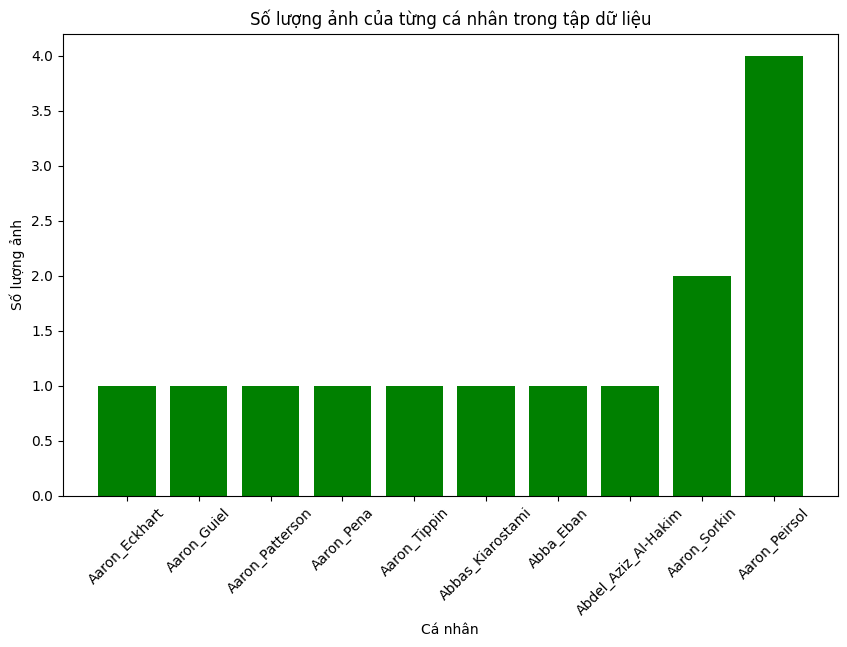

In [12]:
# Danh s√°ch t√™n v√† s·ªë l∆∞·ª£ng ·∫£nh
labels = list(class_mapping.values())  
sizes = list(class_images.values()) 

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color="green")  # D√πng m√†u nh·∫π ƒë·ªÉ bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
plt.xlabel("C√° nh√¢n")
plt.ylabel("S·ªë l∆∞·ª£ng ·∫£nh")
plt.title("S·ªë l∆∞·ª£ng ·∫£nh c·ªßa t·ª´ng c√° nh√¢n trong t·∫≠p d·ªØ li·ªáu")
plt.xticks(rotation=45)  # Xoay t√™n ƒë·ªÉ d·ªÖ ƒë·ªçc
plt.show()

(14, 250, 250) (14,)


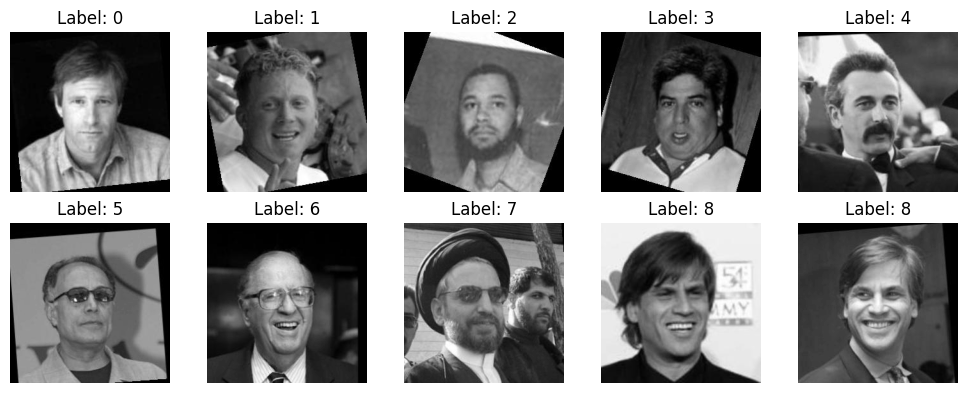

In [13]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Kh·ªüi t·∫°o danh s√°ch l∆∞u h√¨nh ·∫£nh v√† nh√£n
image_arrays = []
image_labels = []
root_image_directory = "D:/NCKH/data/lfw_filtered"

# Duy·ªát qua t·ª´ng c√° nh√¢n trong class_mapping
for label, person in class_mapping.items():
    for directory in os.listdir(root_image_directory):
        if directory.split(" ")[1] == person:
            image_directory = os.path.join(root_image_directory, directory)
            break

    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # ƒê·ªçc ·∫£nh d∆∞·ªõi d·∫°ng grayscale
        image_arrays.append(image)
        image_labels.append(label)

# Chuy·ªÉn danh s√°ch sang NumPy array
image_arrays = np.array(image_arrays)
image_labels = np.array(image_labels)

print(image_arrays.shape, image_labels.shape)

# Hi·ªÉn th·ªã m·ªôt s·ªë h√¨nh ·∫£nh b·∫±ng matplotlib
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # Hi·ªÉn th·ªã 10 h√¨nh ·∫£nh
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(image_arrays[i], cmap="gray")
    axes[i].set_title(f"Label: {image_labels[i]}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

In [14]:
for directory in os.listdir(root_image_directory):
    person_name = " ".join(directory.split(" ")[1:])
    image_directory = os.path.join(root_image_directory, directory)

    if os.path.exists(image_directory):
        num_images = len(os.listdir(image_directory))
        print(f"{person_name}: {num_images} ·∫£nh")

Aaron_Eckhart: 1 ·∫£nh
Aaron_Guiel: 1 ·∫£nh
Aaron_Patterson: 1 ·∫£nh
Aaron_Pena: 1 ·∫£nh
Aaron_Tippin: 1 ·∫£nh
Abbas_Kiarostami: 1 ·∫£nh
Abba_Eban: 1 ·∫£nh
Abdel_Aziz_Al-Hakim: 1 ·∫£nh
Aaron_Sorkin: 2 ·∫£nh
Aaron_Peirsol: 4 ·∫£nh


In [15]:
import numpy as np
import math
from collections import Counter

# T·ª∑ l·ªá ph√¢n chia d·ªØ li·ªáu
train_frac = 0.70
valid_frac = 0.05
test_frac = 0.25

# H√†m t·∫°o c√°c t·∫≠p d·ªØ li·ªáu t·ª´ ƒë·∫ßu v√†o ·∫£nh v√† nh√£n
def create_data_splits(X, y, train_frac=train_frac, test_frac=test_frac, valid_frac=valid_frac):
    X = np.array(X)
    y = np.array(y)

    # Ki·ªÉm tra t·ªïng c√°c t·ª∑ l·ªá c√≥ b·∫±ng 1.0 kh√¥ng
    assert (test_frac + valid_frac + train_frac == 1.0), "T·ªïng c·ªßa t·ª∑ l·ªá Train, Valid, Test ph·∫£i b·∫±ng 1.0"

    # Kh·ªüi t·∫°o danh s√°ch r·ªóng ƒë·ªÉ l∆∞u d·ªØ li·ªáu ph√¢n chia
    X_raw_test, X_raw_valid, X_raw_train = [], [], []
    y_raw_test, y_raw_valid, y_raw_train = [], [], []

  

    # X√°o tr·ªôn d·ªØ li·ªáu ng·∫´u nhi√™n ƒë·ªÉ tr√°nh th·ª© t·ª± c·ªë ƒë·ªãnh
    random_indices = np.random.permutation(len(X))
    X = X[random_indices]
    y = y[random_indices]

    # Duy·ªát qua t·ª´ng ·∫£nh v√† nh√£n ƒë·ªÉ ph√¢n chia d·ªØ li·ªáu
    for image, label in zip(X, y):
        test_length = max(1, math.floor(test_frac * class_images[label]))  # ƒê·∫£m b·∫£o √≠t nh·∫•t c√≥ 1 ·∫£nh
        valid_length = max(1, math.floor(valid_frac * class_images[label]))  # ƒê·∫£m b·∫£o √≠t nh·∫•t c√≥ 1 ·∫£nh

        # Ki·ªÉm tra s·ªë l∆∞·ª£ng ·∫£nh v√† ph√¢n v√†o t·∫≠p d·ªØ li·ªáu t∆∞∆°ng ·ª©ng
        if y_raw_test.count(label) < test_length:
            X_raw_test.append(image)
            y_raw_test.append(label)
        elif y_raw_valid.count(label) < valid_length:
            X_raw_valid.append(image)
            y_raw_valid.append(label)
        else:
            X_raw_train.append(image)
            y_raw_train.append(label)

    # Chuy·ªÉn ƒë·ªïi danh s√°ch sang NumPy arrays, x·ª≠ l√Ω tr∆∞·ªùng h·ª£p danh s√°ch r·ªóng
    X_raw_test = np.array(X_raw_test, dtype=np.float32) if X_raw_test else np.empty((0,) + X.shape[1:], dtype=np.float32)
    y_raw_test = np.array(y_raw_test, dtype=np.int32) if y_raw_test else np.empty((0,), dtype=np.int32)

    X_raw_valid = np.array(X_raw_valid, dtype=np.float32) if X_raw_valid else np.empty((0,) + X.shape[1:], dtype=np.float32)
    y_raw_valid = np.array(y_raw_valid, dtype=np.int32) if y_raw_valid else np.empty((0,), dtype=np.int32)

    X_raw_train = np.array(X_raw_train, dtype=np.float32) if X_raw_train else np.empty((0,) + X.shape[1:], dtype=np.float32)
    y_raw_train = np.array(y_raw_train, dtype=np.int32) if y_raw_train else np.empty((0,), dtype=np.int32)

    return X_raw_train, X_raw_valid, X_raw_test, y_raw_train, y_raw_valid, y_raw_test



# G·ªçi h√†m ƒë·ªÉ ph√¢n chia t·∫≠p d·ªØ li·ªáu
X_train, X_valid, X_test, y_train, y_valid, y_test = create_data_splits(image_arrays, image_labels)

# Ki·ªÉm tra k√≠ch th∆∞·ªõc c·ªßa c√°c t·∫≠p d·ªØ li·ªáu sau khi ph√¢n chia
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(2, 250, 250) (2, 250, 250) (10, 250, 250)
(2,) (2,) (10,)


In [17]:
import matplotlib.pyplot as plt
import random
import numpy as np

# H√†m hi·ªÉn th·ªã h√¨nh ·∫£nh m√†u
def plot_color_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuy·ªÉn t·ª´ BGR sang RGB
    plt.axis('off')

# S·ªë ·∫£nh hi·ªÉn th·ªã cho m·ªói l·ªõp
num_examples = 2

# Duy·ªát qua t·ª´ng l·ªõp v√† hi·ªÉn th·ªã ·∫£nh m·∫´u
for class_number, person in class_mapping.items():
    print('{} - S·ªë l∆∞·ª£ng ·∫£nh: {}'.format(person, class_images[class_number]))
    example_images = []
    
    while len(example_images) < num_examples:
        random_index = np.random.randint(len(X_train))
        if y_train[random_index] == class_number:
            example_images.append(X_train[random_index])
    
    # S·ª≠ d·ª•ng plt.subplots ƒë·ªÉ hi·ªÉn th·ªã ·∫£nh ƒë√∫ng c√°ch
    fig, axes = plt.subplots(1, num_examples, figsize=(10, 4))

    for i, image in enumerate(example_images):
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuy·ªÉn t·ª´ BGR sang RGB
        axes[i].axis('off')

    plt.tight_layout()  # Gi√∫p ·∫£nh hi·ªÉn th·ªã ƒë·∫πp h∆°n
    plt.show()  # Hi·ªÉn th·ªã h√¨nh ·∫£nh

Aaron_Eckhart - S·ªë l∆∞·ª£ng ·∫£nh: 1


KeyboardInterrupt: 

In [18]:
import cv2
import numpy as np

def prepare_image(image, target_height=299, target_width=299):
    image = cv2.resize(image, (target_width, target_height), interpolation=cv2.INTER_AREA)
    return image.astype(np.float32) / 255

In [19]:
from nets import inception 
from tensorflow.contrib import slim
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 299, 299, 3], name='X')
is_training = tf.placeholder_with_default(False, [])
# Run inception function to determine endpoints
with slim.arg_scope(inception.inception_v3_arg_scope()):
 logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=is_training)
# Create saver of network before alterations
inception_saver = tf.train.Saver()
print(end_points)

ImportError: cannot import name 'inception' from 'nets' (c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\nets\__init__.py)

trong nets ko c√≥ ch·ª©a inception.py v√¨ n√≥ thu·ªôc tensorflow ver 1.x ƒë√£ c≈©, hi·ªán ƒëang d√πng ver 2.x

In [20]:
from tensorflow.keras.applications import InceptionV3

# T·∫£i m√¥ h√¨nh v·ªõi tr·ªçng s·ªë ƒë√£ hu·∫•n luy·ªán tr√™n ImageNet
model = InceptionV3(weights='imagenet')

# Xem c·∫•u tr√∫c m√¥ h√¨nh
model.summary()

Model: "inception_v3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1       ‚îÇ (None, 299, 299,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_94 (Conv2D)  ‚îÇ (None, 149, 149,  ‚îÇ        864 ‚îÇ input_layer_1[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 149, 149,  ‚îÇ         96 ‚îÇ conv2d_94[0][0]   ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation_94       ‚îÇ (None, 149, 149,  ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_95 (Conv2D)  ‚îÇ (None, 147, 147,  ‚îÇ      9,216 ‚îÇ activation_94[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 147, 147,  ‚îÇ         96 ‚îÇ conv2d_95[0][0]   ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation_95       ‚îÇ (None, 147, 147,  ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_96 (Conv2D)  ‚îÇ (None, 147, 147,  ‚îÇ     18,432 ‚îÇ activation_95[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 147, 147,  ‚îÇ        192 ‚îÇ conv2d_96[0][0]   ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [21]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model

# Load m√¥ h√¨nh
base_model = InceptionV3(weights='imagenet')

# Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ l·ªõp cu·ªëi c√πng
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('mixed10').output)
print("K√≠ch th∆∞·ªõc ƒë·∫ßu ra:", feature_extractor.output.shape)

K√≠ch th∆∞·ªõc ƒë·∫ßu ra: (None, 8, 8, 2048)


V√¨ sao tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ l·ªõp cu·ªëi c√πng l√† mixed10:
1. ƒë·∫ßu ra d·∫°ng 8,8,2048, v√† ch·ª©a 2048 ƒë·∫∑c tr∆∞ng m·∫°nh nh·∫•t
2. avg_pool kh√¥ng d√πng? _ l·∫•y tb t·ª´ mixed10, l√†m ph·∫≥ng ƒë·∫ßu ra m·∫•t 8,8_gi√∫p gi·∫£m s·ªë l∆∞·ª£ng tham s·ªë tr√°nh overfitting
3. tinh ch·ªânh (fine-tuning) m√¥ h√¨nh v·ªõi CNN n√™n d√πng mixed10


In [22]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

# üîπ 1Ô∏è‚É£ T·∫£i m√¥ h√¨nh InceptionV3 v·ªõi tr·ªçng s·ªë t·ª´ ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False)

# üîπ 2Ô∏è‚É£ Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ l·ªõp cu·ªëi c√πng (Mixed10)
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('mixed10').output)

# üîπ 3Ô∏è‚É£ S·ª≠ d·ª•ng GlobalAveragePooling2D ƒë·ªÉ x·ª≠ l√Ω ƒë·∫ßu ra
prelogits = GlobalAveragePooling2D()(feature_extractor.output)  # (None, 2048)

# üîπ 4Ô∏è‚É£ Th√™m l·ªõp ph√¢n lo·∫°i m·ªõi
n_outputs = 10  # S·ªë l∆∞·ª£ng l·ªõp ph√¢n lo·∫°i (ch·ªânh theo dataset c·ªßa b·∫°n)
people_logits = Dense(n_outputs, activation='softmax', name="people_logits")(prelogits) # l·ªõp cu·ªëi c√πng l√† l·ªõp ph√¢n lo·∫°i (Dense), ƒë∆∞·ª£c th√™m v√†o sau khi tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ m√¥ h√¨nh InceptionV3.


# üîπ 5Ô∏è‚É£ T·∫°o m√¥ h√¨nh m·ªõi v·ªõi ph·∫ßn ƒë·∫ßu v√†o gi·ªØ nguy√™n t·ª´ InceptionV3
new_model = Model(inputs=base_model.input, outputs=people_logits)

# üîπ 6Ô∏è‚É£ Ch·ªâ hu·∫•n luy·ªán l·ªõp cu·ªëi c√πng
for layer in base_model.layers:
    layer.trainable = False  # Gi·ªØ nguy√™n tr·ªçng s·ªë c·ªßa c√°c l·ªõp tr∆∞·ªõc

# üîπ 7Ô∏è‚É£ C·∫•u h√¨nh m√¥ h√¨nh
new_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.01),
                  metrics=['accuracy'])

# üîπ 8Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu hu·∫•n luy·ªán (ƒê·∫£m b·∫£o ki·ªÉu d·ªØ li·ªáu ƒë√∫ng)
X_train = X_train.astype(np.float32)
y_train = np.array(y_train, dtype=np.int64)

# üîπ 9Ô∏è‚É£ Hu·∫•n luy·ªán m√¥ h√¨nh
new_model.fit(X_train, y_train, epochs=10, batch_size=8)

# üîπ üîü L∆∞u m√¥ h√¨nh sau khi hu·∫•n luy·ªán
new_model.save("fine_tuned_inceptionv3.h5")
print("ƒê√£ l∆∞u m√¥ h√¨nh th√†nh c√¥ng! üöÄ")

Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 250, 250), dtype=float32). Expected shape (None, None, None, 3), but input has incompatible shape (None, 250, 250)[0m

Arguments received by Functional.call():
  ‚Ä¢ inputs=tf.Tensor(shape=(None, 250, 250), dtype=float32)
  ‚Ä¢ training=True
  ‚Ä¢ mask=None

In [23]:
import tensorflow as tf
import time
from datetime import datetime

# T·∫°o th∆∞ m·ª•c ƒë·ªÉ l∆∞u logs
now = datetime.now().strftime("%Y%m%d_%H%M%S")
model_dir = "{}_unaugmented".format(now)
logdir = "tensorboard/faces/" + model_dir

# T·∫°o FileWriter m·ªõi cho TensorFlow 2.x
file_writer = tf.summary.create_file_writer(logdir)

# Ghi s·ªë li·ªáu v√†o TensorBoard
with file_writer.as_default():
    for step in range(100):  # Gi·∫£ l·∫≠p 100 b∆∞·ªõc hu·∫•n luy·ªán
        accuracy_value = 0.85 + step * 0.001  # Gi·∫£ l·∫≠p gi√° tr·ªã ƒë·ªô ch√≠nh x√°c
        loss_value = 0.4 - step * 0.001  # Gi·∫£ l·∫≠p gi√° tr·ªã loss

        tf.summary.scalar("valid_acc", accuracy_value, step=step)
        tf.summary.scalar("valid_loss", loss_value, step=step)
        file_writer.flush()  # ƒê·∫£m b·∫£o d·ªØ li·ªáu ƒë∆∞·ª£c ghi ngay v√†o file

tensorboard --logdir=D:/NCKH/tensorboard/faces/20250521_185759_unaugmented
# ch·∫°y tensorboard tr√™n web ƒë·ªÉ xem bi·ªÉu ƒë·ªì valid_acc, cho th·∫•y ƒë·ªô ch√≠nh x√°c x√°c th·ª±c (validation accuracy) c·ªßa m√¥ h√¨nh tƒÉng t·ª´ kho·∫£ng 0.85 -     ~0.95


In [25]:
import os
import cv2
import numpy as np

data_dir = "D:/NCKH/data/lfw_filtered"
img_size = (299, 299)

X, Y = [], []
label_map = {}  # L∆∞u √°nh x·∫° t√™n th∆∞ m·ª•c th√†nh s·ªë l·ªõp

for label, person_folder in enumerate(sorted(os.listdir(data_dir))):
    label_map[label] = person_folder
    folder_path = os.path.join(data_dir, person_folder)
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)  # ƒê·ªçc ·∫£nh
        img = cv2.resize(img, img_size)  # Resize ·∫£nh v·ªÅ (299,299)
        X.append(img)
        Y.append(label)  # G√°n nh√£n s·ªë

# Chuy·ªÉn v·ªÅ NumPy
X = np.array(X, dtype=np.float32) / 255.0  # Chu·∫©n h√≥a v·ªÅ [0,1]
Y = np.array(Y, dtype=np.int32)

print(f"ƒê√£ t·∫£i {X.shape[0]} ·∫£nh, k√≠ch th∆∞·ªõc m·ªói ·∫£nh: {X.shape[1:]}")
print(f"S·ªë l·ªõp: {len(set(Y))}, √°nh x·∫° nh√£n: {label_map}")

ƒê√£ t·∫£i 14 ·∫£nh, k√≠ch th∆∞·ªõc m·ªói ·∫£nh: (299, 299, 3)
S·ªë l·ªõp: 10, √°nh x·∫° nh√£n: {0: '001 Aaron_Eckhart', 1: '001 Aaron_Guiel', 2: '001 Aaron_Patterson', 3: '001 Aaron_Pena', 4: '001 Aaron_Tippin', 5: '001 Abba_Eban', 6: '001 Abbas_Kiarostami', 7: '001 Abdel_Aziz_Al-Hakim', 8: '002 Aaron_Sorkin', 9: '004 Aaron_Peirsol'}


In [26]:
print(os.listdir("D:/NCKH/data/lfw"))

['lfw-deepfunneled', 'lfw_allnames.csv', 'lfw_readme.csv', 'matchpairsDevTest.csv', 'matchpairsDevTrain.csv', 'mismatchpairsDevTest.csv', 'mismatchpairsDevTrain.csv', 'pairs.csv', 'people.csv', 'peopleDevTest.csv', 'peopleDevTrain.csv']


In [27]:
import tensorflow as tf
import numpy as np
import time
from datetime import datetime

# üîπ 1Ô∏è‚É£ T·∫°o m√¥ h√¨nh InceptionV3
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('mixed10').output)
prelogits = tf.keras.layers.GlobalAveragePooling2D()(feature_extractor.output)

n_outputs = 10
people_logits = tf.keras.layers.Dense(n_outputs, activation='softmax', name="people_logits")(prelogits)

new_model = tf.keras.Model(inputs=base_model.input, outputs=people_logits)

# üîπ 2Ô∏è‚É£ Ch·ªâ hu·∫•n luy·ªán l·ªõp cu·ªëi c√πng
for layer in base_model.layers:
    layer.trainable = False

# üîπ 3Ô∏è‚É£ C·∫•u h√¨nh m√¥ h√¨nh
new_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

# üîπ 4Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu gi·∫£ l·∫≠p
X_train = np.random.rand(100, 299, 299, 3).astype(np.float32)
y_train = np.random.randint(0, n_outputs, 100).astype(np.int32)

# üîπ 5Ô∏è‚É£ Thi·∫øt l·∫≠p TensorBoard
now = datetime.now().strftime("%Y%m%d_%H%M%S")
logdir = f"tensorboard/faces/{now}_unaugmented"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# üîπ 6Ô∏è‚É£ D·ª´ng s·ªõm n·∫øu kh√¥ng c·∫£i thi·ªán sau 20 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# üîπ 7Ô∏è‚É£ Hu·∫•n luy·ªán m√¥ h√¨nh
new_model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_split=0.2,
              callbacks=[tensorboard_callback, early_stopping])

# üîπ 8Ô∏è‚É£ L∆∞u m√¥ h√¨nh sau khi hu·∫•n luy·ªán
new_model.save("fine_tuned_inceptionv3.h5")
print("ƒê√£ l∆∞u m√¥ h√¨nh th√†nh c√¥ng! üöÄ")

Epoch 1/100


OverflowError: Python int too large to convert to C long

tensorboard --logdir=D:\NCKH\tensorboard\faces\20250521_191425_unaugmented\train

In [28]:
import scipy
# Take in an image as an array and return image with a [dx, dy] shift
def shift_image(image_array, shift):
 return scipy.ndimage.interpolation.shift(image_array, shift, cval=0)
# Four shifts of 30 pixels 
shifts = [[30,0], [-30,0], [0, 30], [0,-30]]
shifted_images = []
shifted_labels = []
# Iterate through all training images
for image, label in zip(X_train, y_train):
 
 # Swap the color channel and height axis 
 layers = np.swapaxes(image, 0, 2)
 
 # Apply four shifts to each original image
 for shift in shifts:
    transposed_image_layers = []
 
 # Apply the shift to the image one layer at a time
 # Each layer is an RGB color channel
 for layer in layers:
    transposed_image_layers.append(shift_image(layer, shift))
 
 # Stack the RGB layers to get one image and reswap the axes
 transposed_image = np.stack(transposed_image_layers)
 transposed_image = np.swapaxes(transposed_image, 0, 2)
 
 # Add the shifted images and the labels to a list
 shifted_images.append(transposed_image)
 shifted_labels.append(label)
# Convert the images and labels to numpy arrays
shifted_images = np.array(shifted_images)
shifted_labels = np.array(shifted_labels)
print(shifted_images.shape,shifted_labels.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14716\3173237373.py:4: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  return scipy.ndimage.interpolation.shift(image_array, shift, cval=0)


(100, 299, 299, 3) (100,)


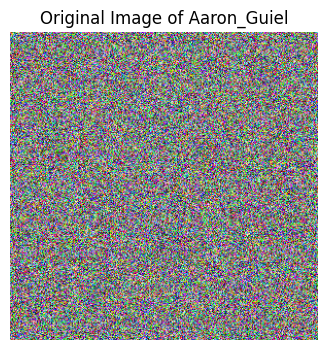

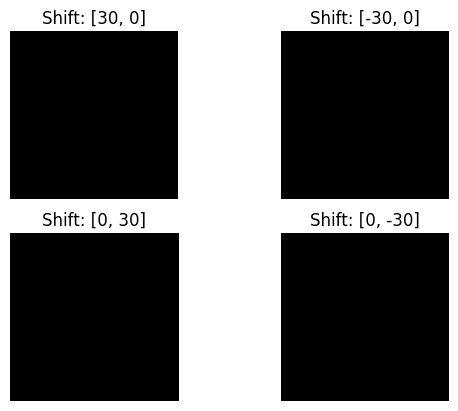

In [30]:
ex_index = 5
# Plot original image
plot_color_image(X_train[ex_index])
plt.title("Original Image of {}".format(class_mapping[y_train[ex_index]]))
plt.show()
ex_shifted_images = shifted_images[ex_index*4:(ex_index*4)+ 4]
# Plot four shifted images
for i, image in enumerate(ex_shifted_images):
 shift = shifts[i]
 plt.subplot(2,2,i+1)
 plt.imshow(image.astype(np.uint8), interpolation='nearest')
 plt.title('Shift: {}'.format(shift))
 plt.axis('off')
plt.show()

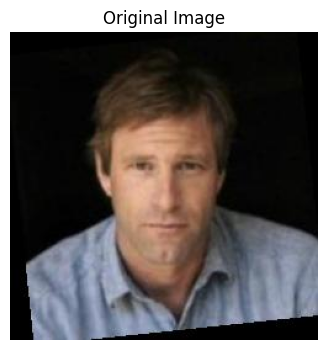

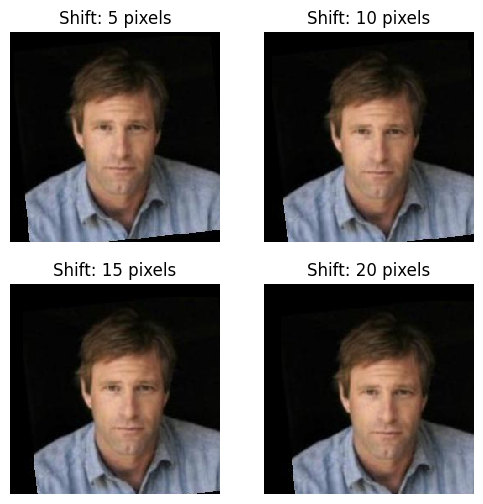

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ƒê·ªçc ·∫£nh b·∫±ng OpenCV
ex_index = 5
image_path = r"D:\NCKH\data\lfw_filtered\001 Aaron_Eckhart\Aaron_Eckhart_0001.jpg"  # Thay ƒë∆∞·ªùng d·∫´n ·∫£nh c·ªßa b·∫°n
original_image = cv2.imread(image_path)  # ƒê·ªçc ·∫£nh
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Chuy·ªÉn sang RGB ƒë·ªÉ hi·ªÉn th·ªã ƒë√∫ng m√†u v·ªõi Matplotlib

# Hi·ªÉn th·ªã ·∫£nh g·ªëc
plt.figure(figsize=(4,4))
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# T·∫°o m·ªôt s·ªë bi·∫øn ƒë·ªïi h√¨nh ·∫£nh ƒë·ªÉ m√¥ ph·ªèng hi·ªáu ·ª©ng shift
ex_shifted_images = [cv2.warpAffine(original_image, np.float32([[1, 0, shift], [0, 1, shift]]), (original_image.shape[1], original_image.shape[0])) for shift in [5, 10, 15, 20]]

# Hi·ªÉn th·ªã c√°c ·∫£nh ƒë√£ d·ªãch chuy·ªÉn
plt.figure(figsize=(6,6))
for i, image in enumerate(ex_shifted_images):
    shift = [5, 10, 15, 20][i]  # ƒê·ªô d·ªãch chuy·ªÉn
    plt.subplot(2, 2, i+1)
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.title(f'Shift: {shift} pixels')
    plt.axis('off')

plt.show()

In [32]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (100, 299, 299, 3)
y_train shape: (100,)


In [33]:
# Create a new training set with the original and shifted images
X_train_exp = np.concatenate((shifted_images, X_train))
y_train_exp = np.concatenate((shifted_labels, y_train))
print(X_train_exp.shape, y_train_exp.shape)

(200, 299, 299, 3) (200,)


In [47]:
import os
print(os.path.exists(image_path))  # Ki·ªÉm tra xem t·ªáp c√≥ t·ªìn t·∫°i kh√¥ng

False


In [42]:
images_flipped = []
labels_flipped = []
# Flip every image in the training set
for image, label in zip(X_train, y_train):
 images_flipped.append(np.fliplr(image))
 labels_flipped.append(label)
# Convert the flipped images and labels to arrays
images_flipped = np.array(images_flipped)
labels_flipped = np.array(labels_flipped)

In [43]:
print("S·ªë ·∫£nh trong X_train:", len(X_train))

S·ªë ·∫£nh trong X_train: 100


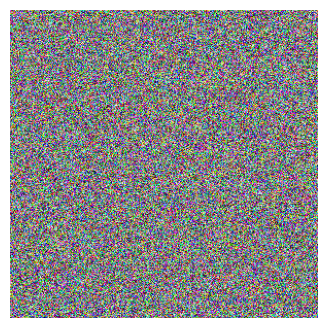

In [34]:
import random
ex_index = random.randint(0, len(X_train) - 1)
plot_color_image(X_train[ex_index])

In [36]:
ex_index = 652
plot_color_image(X_train[ex_index])
plt.title('Original Image of {}'.format(class_mapping[y_train[ex_index]]))
plt.show()
plot_color_image(images_flipped[ex_index])
plt.title('Left to Right Flipped Image')
plt.show()

IndexError: index 652 is out of bounds for axis 0 with size 100

In [94]:
X_train_with_flip = np.concatenate((X_train, images_flipped))
y_train_with_flip = np.concatenate((y_train, labels_flipped))
print(X_train_with_flip.shape, y_train_with_flip.shape)

(200, 299, 299, 3) (200,)


In [37]:
print(globals().keys())  # Xem c√°c bi·∫øn ƒë√£ c√≥ trong ch∆∞∆°ng tr√¨nh

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'os', 'np', 'plt', 'tf', 'ImageDataGenerator', 'InceptionV3', 'preprocess_input', 'layers', 'models', 'cosine_similarity', 'LabelEncoder', 'urllib', 'random', 'tarfile', 'zipfile', 'slim', '_i2', 'INCEPTION_V3_URL', 'MODEL_DIR', 'filename', 'filepath', '_i3', '_i4', 'file_path', 'extract_path', 'zip_ref', '_i5', 'Image', 'model', 'load_and_preprocess_image', '_i6', 'lfw_folder', '_i7', 'people', 'people_number', 'person', 'person_folder', 'num_images', 'people_with_one_photo', '_i8', 'copy_tree', 'num_classes', 'IMAGES_DOWNLOAD_DIRECTORY', 'IMAGES_DIRECTORY', 'name', 'folder_path', 'formatted_num_images', 'new_folder_name', 'image_new_name', 'dst_folder', '_i9', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', 'class_map

In [41]:
def classify_image(index, images=X_test, labels=y_test):
     image_array = images[index]
label = class_mapping[labels[index]]
 
prepared_image = prepare_image(image_array)
prepared_image = np.reshape(prepared_image, newshape=(-1, 299, 299, 3))
 
with tf.Session() as sess:
    saver.restore(sess, restart_augmented_training_path)
predictions = sess.run(probability, {X: prepared_image})
 
predictions = [(i, prediction) for i, prediction in enumerate(predictions[0])]
predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
print('\nCorrect Answer: {}'.format(label)) 
print('\nPredictions:')
for prediction in predictions:
    class_label = prediction[0]
probability_value = prediction[1]
label = class_mapping[class_label]
print("{:26}: {:.2f}%".format(label, probability_value * 100))
 
plot_color_image(image_array)
return predictions

KeyError: 'Aaron_Peirsol'